# Задание 1. Работа с данными (датасет ID_data_mass_18122012)

Цель - провести очистку набора данных и отобрать признаки.

Целевые переменные G_total и КГФ

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/6 сем/обработка данных/Задание 1/ID_data_mass_18122012.xlsx', sheet_name='VU', header=1)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [4]:
units = df.iloc[[0]]
df = df.iloc[1:]

In [5]:
units

,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
0,№,дд.мм.гггг,м,мм,бара,бара,бара,бар,бар,бар,...,МПа,атм,бар,кг/м3,кг/м3,кг/м3,б/р,кг/с,г/м3,т/тыс.м3


In [6]:
df

,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
1,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,...,-,93.6,92.376018,0.806017,801,1000,0.669449,2.782623,311.9094,NaN
2,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,...,-,92.9,91.685171,0.806017,801,1000,0.669449,3.697781,288.6003,NaN
3,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,...,-,91.4,90.204787,0.806017,801,1000,0.669449,4.515073,248.7906,NaN
4,804,2008-06-08 00:00:00,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,...,-,89.2,88.033555,0.806017,801,1000,0.669449,5.217673,223.5591,NaN
5,804,2008-06-09 00:00:00,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,...,-,89.7,88.527017,0.806017,801,1000,0.669449,5.765092,215.1486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,22505,2009-09-23 00:00:00,3678,12.7,182.2,271.586,93.255111,179,258.6,92.702141,...,60.8,89.7,88.527017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,22505,2009-09-27 00:00:00,3678,14.29,157,249.076,96.472143,153,233.5,100.060417,...,60.8,87.3,86.158401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,22505,2010-04-09 00:00:00,3679.5,7.94,211.9,289.3877,91.131226,208,289.6,91.304642,...,61.3,88.2,87.046632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,22505,2010-04-14 00:00:00,3679.5,9.53,204,282.8709,91.173008,201,275.3,91.616821,...,61.3,88.5,87.342709,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 1'])

In [8]:
df.shape

(185, 32)

Количество строк, в которых обе целевые переменные G_total и КГФ пустые:

In [9]:
df[(df['G_total'].isna()) & (df['КГФ'].isna())].shape[0]

162

In [10]:
df.dropna(subset=['G_total', 'КГФ'], how='all', inplace=True)

In [11]:
df.shape[0]

23

Пропуски заполнить NaN

In [12]:
df.isna().sum()

,0
Глубина манометра,0
Dшт,0
Руст,0
Рзаб,0
Pлин,0
Руст.1,0
Рзаб.1,0
Рлин,0
Туст,0
Тна шлейфе,4


In [13]:
df.fillna(np.nan, inplace=True)

In [14]:
df.isna().sum()

,0
Глубина манометра,0
Dшт,0
Руст,0
Рзаб,0
Pлин,0
Руст.1,0
Рзаб.1,0
Рлин,0
Туст,0
Тна шлейфе,4


In [15]:
(df[:] == "-").sum()

,0
Глубина манометра,0
Dшт,0
Руст,0
Рзаб,1
Pлин,0
Руст.1,0
Рзаб.1,1
Рлин,0
Туст,0
Тна шлейфе,1


In [16]:
(df[:] == " ").sum()

,0
Глубина манометра,0
Dшт,0
Руст,0
Рзаб,0
Pлин,0
Руст.1,0
Рзаб.1,0
Рлин,0
Туст,0
Тна шлейфе,0


In [17]:
df.replace("-", pd.NA, inplace=True)

In [18]:
(df[:] == "-").sum()

,0
Глубина манометра,0
Dшт,0
Руст,0
Рзаб,0
Pлин,0
Руст.1,0
Рзаб.1,0
Рлин,0
Туст,0
Тна шлейфе,0


Сохранить названия признаков

In [19]:
features = df.head(0).iloc[:, 2:]

In [20]:
features

,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1


Построить гистограмму важности признаков по критерию gain_ratio (нормированный прирост информации)

In [21]:
def replaceNonNumeric(x):
    try:
        float(x)
        return x
    except:
        return np.nan
df = df.applymap(replaceNonNumeric)

<ipython-input-21-3846e2ab9689>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(replaceNonNumeric)


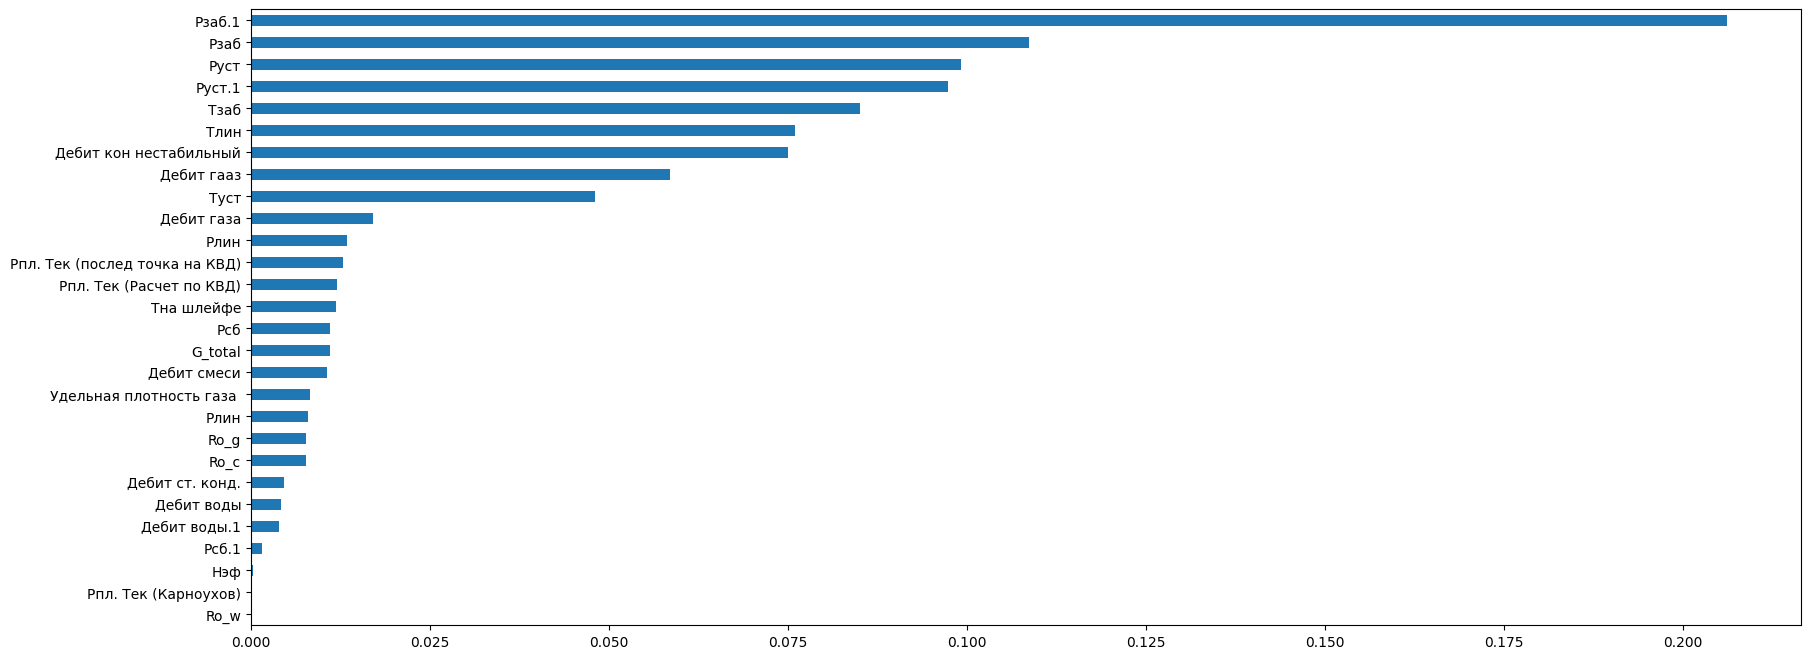

In [22]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X = df[df.columns[2:-2]].fillna(-100)
y = df[df.columns[-2:]].fillna(-100)

clf = RandomForestRegressor()
clf.fit(X, y)

imp = pd.Series(clf.feature_importances_, X.columns[0:len(X.columns)]).sort_values()
plt.figure(figsize=(20,8))
imp.plot(kind='barh')
plt.show()

'Ro_w', 'Ro_g',
                'Рпл. Тек (Расчет по КВД)', 'Рпл. Тек (Карноухов)',
                'Руст', 'Руст.1', 'Рзаб.1',
                'Дебит гааз', 'Дебит воды.1', 'Дебит смеси',
                'Pлин', 'Рлин', 'Pсб.1',
                'Глубина манометра', 'Тна шлейфе', 'Нэф'

Построить тепловую карту признаков (матрица корреляций всех признаков со всеми, в том числе целевыми переменными), для удобства коэффициент корреляции берите по модулю

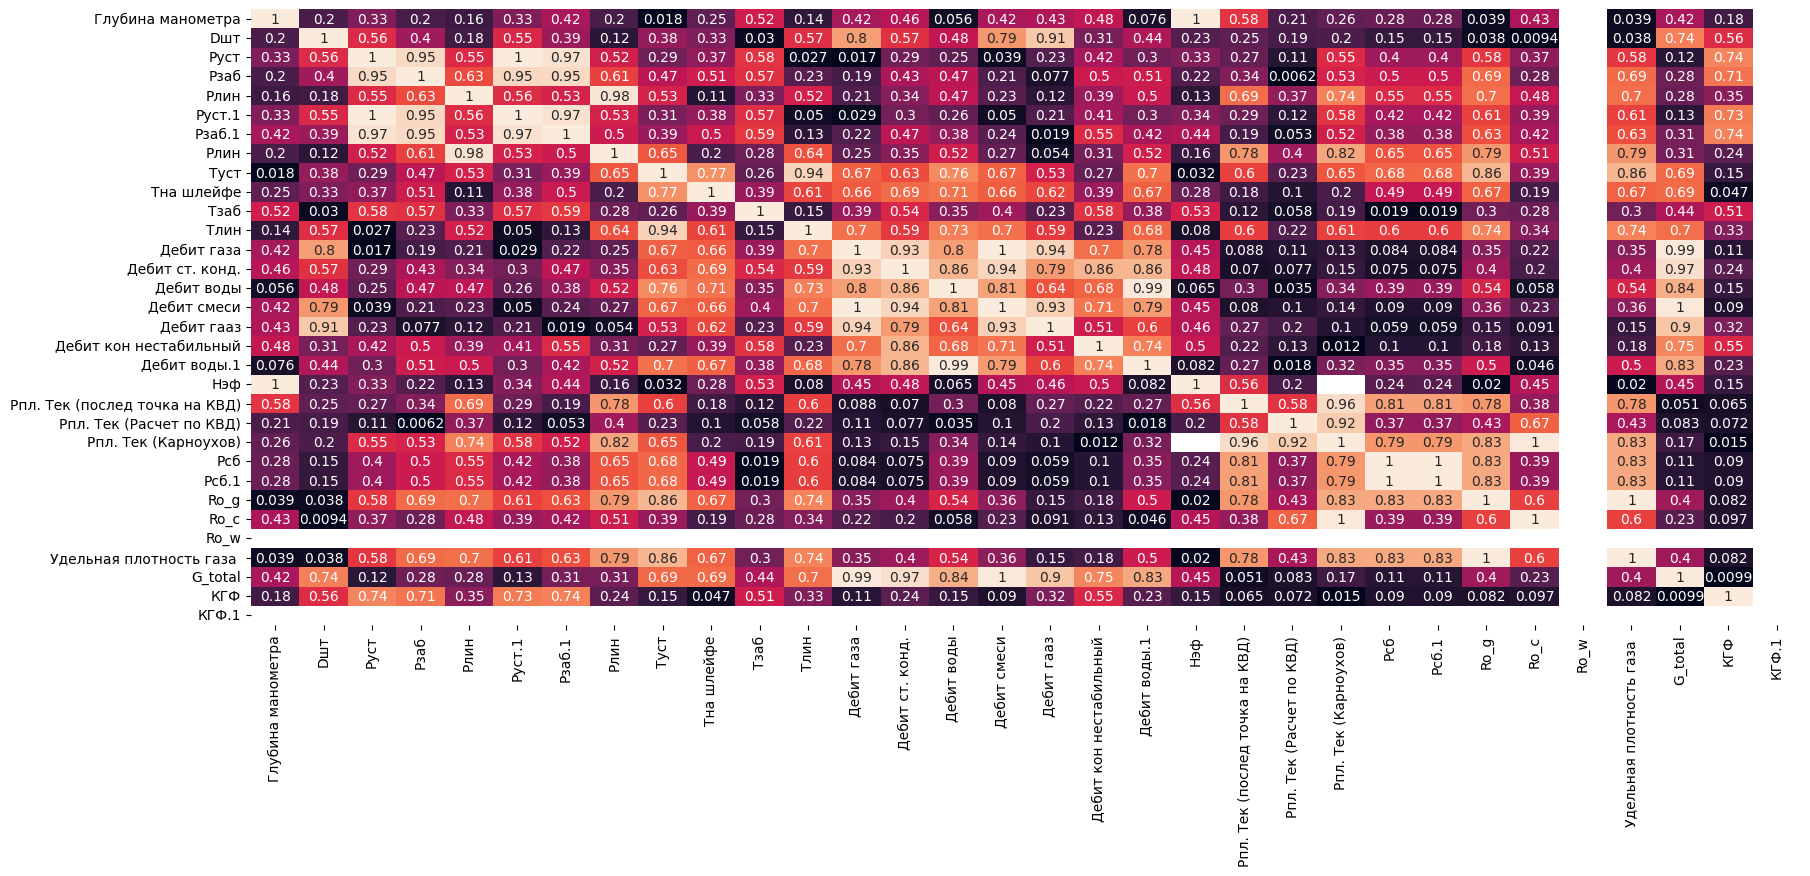

In [23]:
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(abs(df.corr()), annot=True, ax=ax, cbar=False)
plt.show()

Для каждого признака построить график распределения с отложенными на нем линиями первого и третьего квартилей

Легенда:

голубой - первый и третий квартили

красный - медиана

желтый - среднее



/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


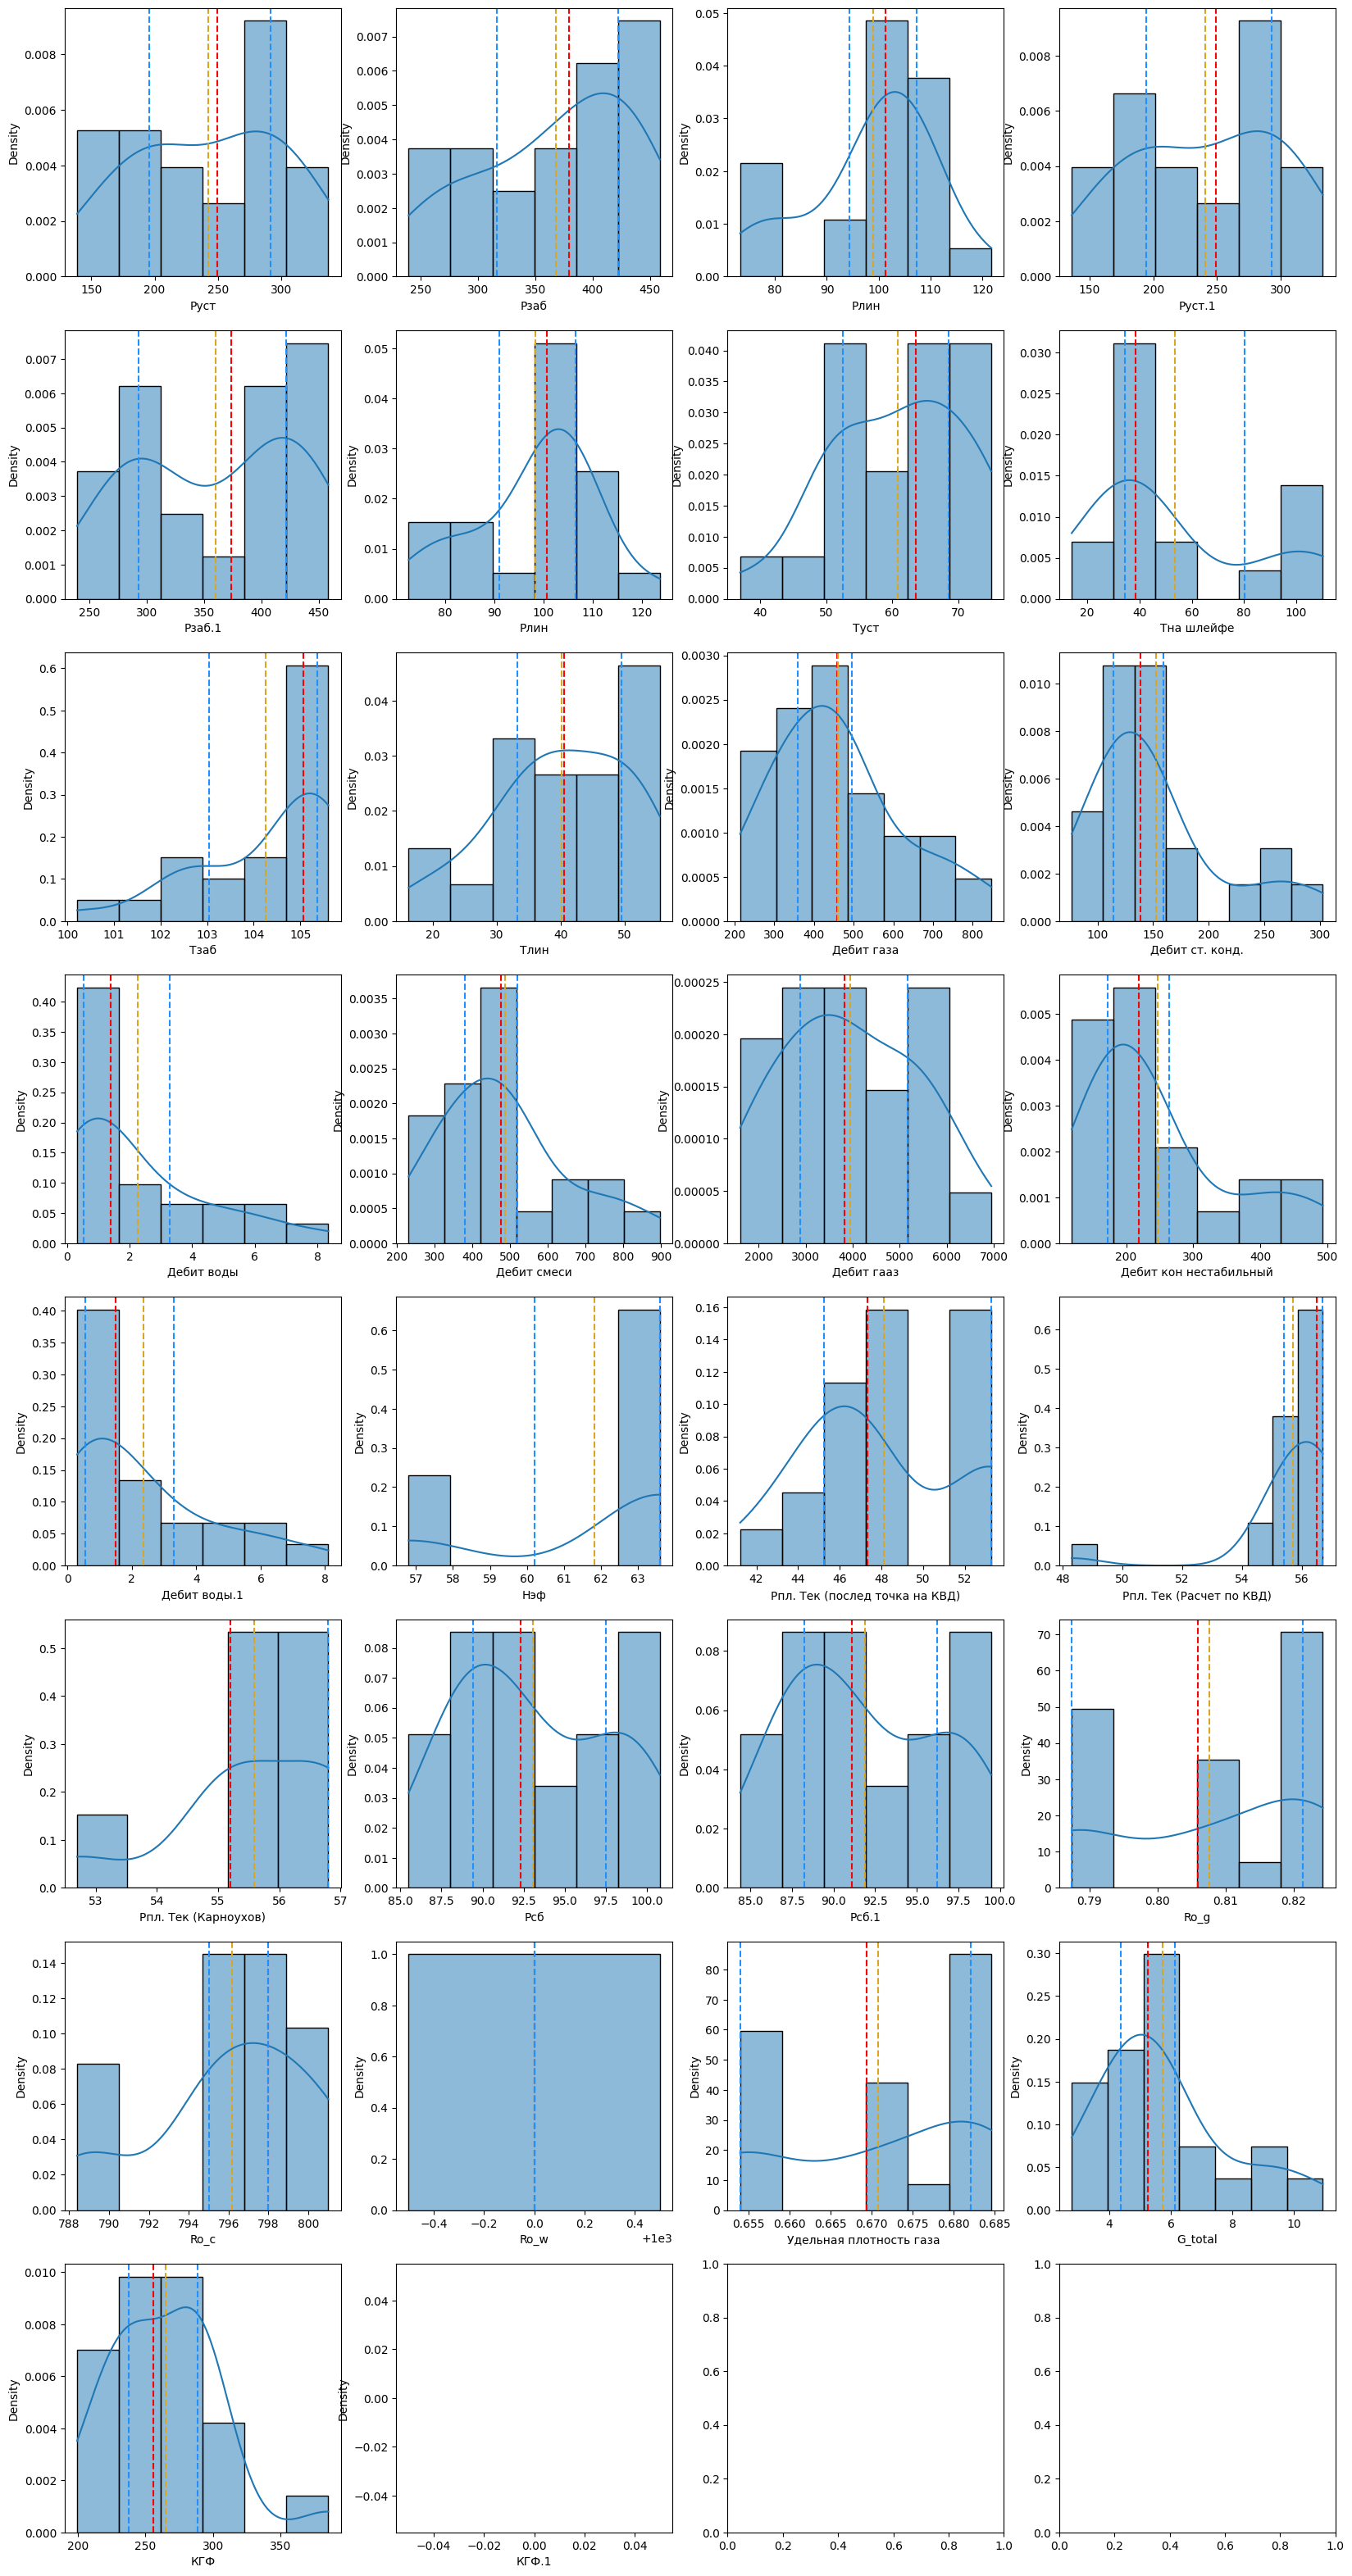

In [24]:
print("Легенда:\n")
print("голубой - первый и третий квартили\n")
print("красный - медиана\n")
print("желтый - среднее\n")

rows, columns = df.shape

if columns % 4 == 0:
    f, ax = plt.subplots(int(columns // 4), 4, figsize=(20, int(columns // 4) * 5))
else:
    f, ax = plt.subplots(int(columns // 4) + 1, 4, figsize=(20, (int(columns // 4) + 1) * 5))

i = 0
j = 0

features = df.head(0).iloc[:, 2:]

for column in features:
    if j == 4:
        j = 0
        i += 1

    sns.histplot(df[column], ax=ax[i, j], kde=True, stat="density")

    ax[i, j].axvline(df[column].quantile(0.25), color="dodgerblue", ls='--')
    ax[i, j].axvline(df[column].quantile(0.5), color="red", ls='--')
    ax[i, j].axvline(df[column].mean(), color="goldenrod", ls='--')
    ax[i, j].axvline(df[column].quantile(0.75), color="dodgerblue", ls='--')

    j += 1

Для каждого признака посчитать элементы описательной статистики

In [25]:
summary = df.describe()
print(summary)

       Глубина манометра        Dшт        Руст        Рзаб        Pлин  \
count          22.000000  23.000000   23.000000   22.000000   23.000000   
mean         3631.127273  11.804348  242.507904  367.727273   98.861344   
std            34.389356   2.569128   59.287573   67.399316   12.094472   
min          3576.300000   7.940000  138.866667  239.300000   73.306638   
25%          3594.725000   9.530000  195.550000  316.025000   94.416770   
50%          3650.000000  11.110000  249.600000  379.400000  101.300000   
75%          3653.000000  14.290000  291.663710  422.075000  107.309079   
max          3653.000000  15.880000  337.108108  458.600000  121.682930   

           Руст.1      Рзаб.1        Рлин       Туст  Тна шлейфе  ...  \
count   23.000000   22.000000   23.000000  23.000000   18.000000  ...   
mean   240.673913  359.990909   98.286720  60.808696   53.494444  ...   
std     59.242876   70.700824   12.396412  10.192908   31.771713  ...   
min    136.000000  239.300000   

Удалим наименее важные признаки

In [26]:
df = df.drop(columns=['Ro_w', 'Ro_g', 'Ro_c',
                'Рпл. Тек (Расчет по КВД)', 'Рпл. Тек (Карноухов)',
                'Руст', 'Руст.1', 'Рзаб.1',
                'Дебит гааз', 'Дебит воды.1', 'Дебит смеси',
                'Pлин', 'Рлин', 'Pсб.1',
                'Глубина манометра', 'Тна шлейфе', 'Нэф'])

In [27]:
df.columns

Index(['Dшт', 'Рзаб', 'Туст', 'Тзаб', 'Tлин', 'Дебит газа', 'Дебит ст. конд.',
       'Дебит воды', 'Дебит кон нестабильный',
       'Рпл. Тек (послед точка на КВД)', 'Pсб', 'Удельная плотность газа ',
       'G_total', 'КГФ', 'КГФ.1'],
      dtype='object')